In [ ]:
           ################################################################################################## 

In [ ]:
           ################################   MODELING BEFORE ADDING NEW FEATURES  ########################## 

In [ ]:
           ##################################################################################################

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataset_path = 'C:/Users/adnan/OneDrive/Desktop/CIND820 capstone/dataset.csv'
df = pd.read_csv(dataset_path)
print(df.head(10))

  Company        Date Close/Last    Volume      Open       High       Low
0    AAPL  07/17/2023    $193.99  50520160   $191.90    $194.32   $191.81
1    AAPL  07/14/2023    $190.69  41616240   $190.23  $191.1799   $189.63
2    AAPL  07/13/2023    $190.54  41342340   $190.50    $191.19   $189.78
3    AAPL  07-12-2023    $189.77  60750250   $189.68    $191.70   $188.47
4    AAPL  07-11-2023    $188.08  46638120   $189.16    $189.30   $186.60
5    AAPL  07-10-2023    $188.61  59922160   $189.26    $189.99  $187.035
6    AAPL  07-07-2023    $190.68  46815000   $191.41    $192.67   $190.24
7    AAPL  07-06-2023    $191.81  45156010   $189.84    $192.02   $189.20
8    AAPL  07-05-2023    $191.33  46920260  $191.565    $192.98   $190.62
9    AAPL  07-03-2023    $192.46  31346600   $193.78    $193.88   $191.76


In [140]:
# Convert columns with dollar sign to numeric and Date column to datetime
cols_with_dollar = ['Close/Last', 'Open', 'High', 'Low']
df[cols_with_dollar] = df[cols_with_dollar].replace({'\$': '', ',': ''}, regex=True).astype(float)
def parse_mixed_dates(date_str):
    
    try:
        return pd.to_datetime(date_str, format='%m/%d/%Y')
    except ValueError:
        
        try:
            return pd.to_datetime(date_str, format='%d-%m-%Y')
        except ValueError:
            
            return pd.NaT

df['Date'] = df['Date'].apply(parse_mixed_dates)

print(df.head(10))
# Descriptive Statistics
descriptive_stats = df.describe()
print(descriptive_stats)
# Specify your path
path = 'C:/Users/adnan/OneDrive/Desktop/CIND820 capstone/'
#  save the descriptive statistics
descriptive_stats.to_csv('descriptive_stats.csv')
descriptive_stats.to_excel('descriptive_stats.xlsx')
descriptive_stats.to_latex('descriptive_stats.tex')


  Company       Date  Close/Last    Volume     Open      High      Low
0    AAPL 2023-07-17      193.99  50520160  191.900  194.3200  191.810
1    AAPL 2023-07-14      190.69  41616240  190.230  191.1799  189.630
2    AAPL 2023-07-13      190.54  41342340  190.500  191.1900  189.780
3    AAPL 2023-12-07      189.77  60750250  189.680  191.7000  188.470
4    AAPL 2023-11-07      188.08  46638120  189.160  189.3000  186.600
5    AAPL 2023-10-07      188.61  59922160  189.260  189.9900  187.035
6    AAPL 2023-07-07      190.68  46815000  191.410  192.6700  190.240
7    AAPL 2023-06-07      191.81  45156010  189.840  192.0200  189.200
8    AAPL 2023-05-07      191.33  46920260  191.565  192.9800  190.620
9    AAPL 2023-03-07      192.46  31346600  193.780  193.8800  191.760
                                Date    Close/Last        Volume  \
count                          25160  25160.000000  2.516000e+04   
mean   2018-07-16 12:08:00.763115776    102.455878  5.131764e+07   
min            

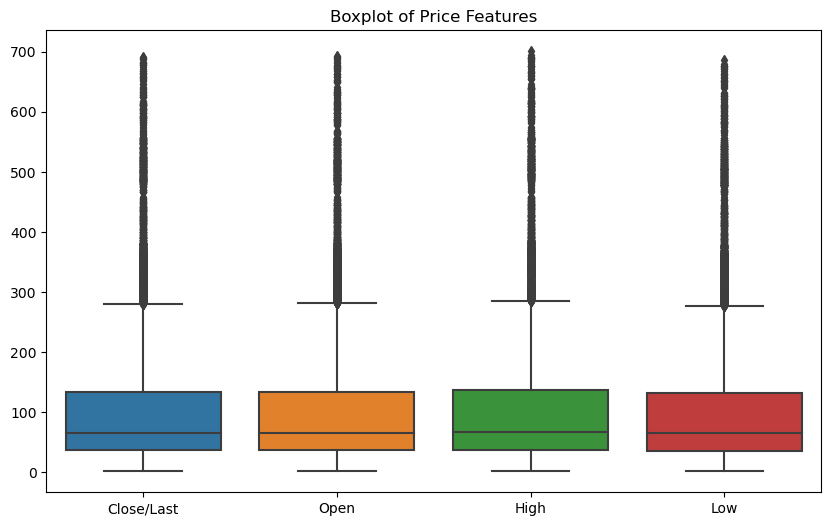

In [141]:

# Separate the dataframe into different dataframes based on scale
df_prices = df[['Close/Last', 'Open', 'High', 'Low']]
df_volume = df[['Volume']]  

# Plotting the prices
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_prices)
plt.title('Boxplot of Price Features')
plt.show()


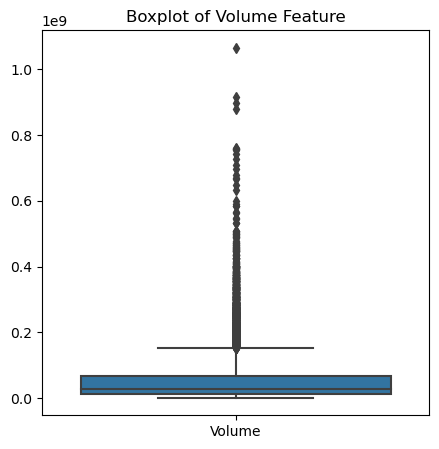

In [142]:
# Plotting the volume
plt.figure(figsize=(5, 5))
sns.boxplot(data=df_volume)
plt.title('Boxplot of Volume Feature')
plt.show()

In [143]:
# Remove the outliers 
columns_to_check = ['Close/Last', 'Volume', 'Open', 'High', 'Low'] 
df_filtered = df.copy()
outliers_removed = {} 

for column in columns_to_check:
    Q1 = df_filtered[column].quantile(0.25)
    Q3 = df_filtered[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame 
    outliers_removed[column] = len(df_filtered) - len(df_filtered[(df_filtered[column] >= lower_bound) & (df_filtered[column] <= upper_bound)])

    df_filtered = df_filtered[(df_filtered[column] >= lower_bound) & (df_filtered[column] <= upper_bound)]
total_outliers_removed = sum(outliers_removed.values())
print(f"Total number of outliers removed: {total_outliers_removed}")

for column, count in outliers_removed.items():
    print(f"Number of outliers removed in {column}: {count}")


Total number of outliers removed: 4517
Number of outliers removed in Close/Last: 1902
Number of outliers removed in Volume: 1423
Number of outliers removed in Open: 783
Number of outliers removed in High: 277
Number of outliers removed in Low: 132


In [144]:
#Feature Engineering

df = df_filtered.copy()
df.loc[:, 'Price Change'] = df['Close/Last'].diff()
df.loc[:, 'Target'] = df['Price Change'].apply(lambda x: 1 if x > 0 else 0)
X = df[['Volume', 'Open', 'High', 'Low']]  
y_regression = df['Close/Last'] # Regression target
y_classification = df['Target'] # Classification target



Class Counts:
Target
0    10878
1     9765
Name: count, dtype: int64

Class Imbalance Ratio: 0.8976833976833977


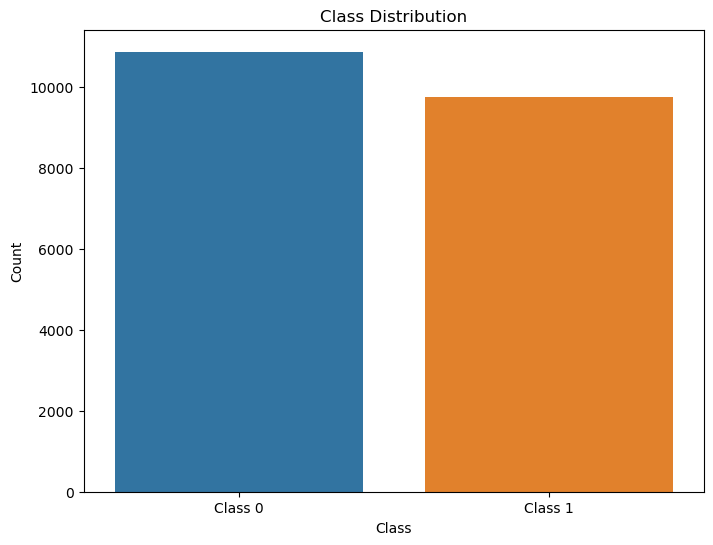

In [145]:
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns
class_counts = df['Target'].value_counts()

print("Class Counts:")
print(class_counts)

imbalance_ratio = class_counts.min() / class_counts.max()

print("\nClass Imbalance Ratio:", imbalance_ratio)

class_counts = df['Target'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(range(len(class_counts.index)), ['Class 0', 'Class 1'])  # Assuming binary classification
plt.show()


Class Counts after Upsampling:
Target
0    10878
1    10878
Name: count, dtype: int64


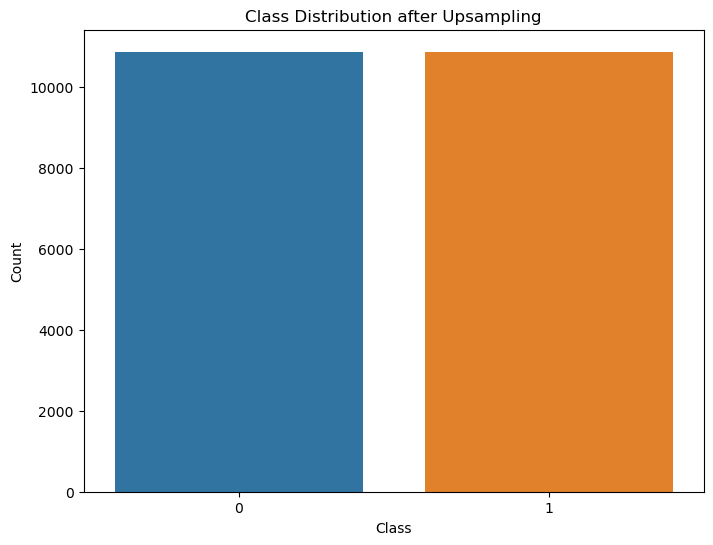

In [146]:
df_combined = pd.concat([X, y_classification], axis=1)
# Separate majority and minority classes
df_majority = df_combined[df_combined['Target'] == 0]
df_minority = df_combined[df_combined['Target'] == 1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,   
                                 n_samples=len(df_majority),   
                                 random_state=123) 

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])


class_counts_upsampled = df_upsampled['Target'].value_counts()
print("Class Counts after Upsampling:")
print(class_counts_upsampled)
X_upsampled = df_upsampled[['Volume', 'Open', 'High', 'Low']]
y_classification_upsampled = df_upsampled['Target']
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts_upsampled.index, y=class_counts_upsampled.values)
plt.title('Class Distribution after Upsampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(range(len(class_counts_upsampled.index)), class_counts_upsampled.index)
plt.show()

In [147]:
#Model Building and Evaluation

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_upsampled, y_classification_upsampled, test_size=0.2, random_state=42)

scaler_reg = StandardScaler()
scaler_class = StandardScaler()

scaler_reg.fit(X_train_reg)
scaler_class.fit(X_train_class)

X_train_reg = scaler_reg.transform(X_train_reg)
X_train_class = scaler_class.transform(X_train_class)

X_test_reg = scaler_reg.transform(X_test_reg)
X_test_class = scaler_class.transform(X_test_class)

In [148]:
feature_names = ['Volume', 'Open', 'High', 'Low']

X_train_reg_df = pd.DataFrame(X_train_reg, columns=feature_names)

print(X_train_reg_df.head())

X_test_class_df = pd.DataFrame(X_test_class, columns=feature_names)

print(X_test_class_df.head())


     Volume      Open      High       Low
0  0.045811 -1.031274 -1.033558 -1.032211
1  0.913010 -0.692116 -0.697352 -0.689912
2 -0.052152 -0.570136 -0.570747 -0.568409
3 -0.406907 -0.973350 -0.970501 -0.970623
4 -0.954966  0.833250  0.811795  0.850144
     Volume      Open      High       Low
0  0.939953 -1.239267 -1.239933 -1.251075
1 -0.645954 -0.766020 -0.773118 -0.765500
2  0.884972  1.350729  1.343777  1.350382
3 -0.308613 -0.700579 -0.678750 -0.693705
4  0.415449 -0.511827 -0.522115 -0.511387


In [149]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
import numpy as np

reg_models = [RandomForestRegressor(), DecisionTreeRegressor(), KNeighborsRegressor()]


class_models = [RandomForestClassifier(), DecisionTreeClassifier(), KNeighborsClassifier()]


print("Regression Models Evaluation:")
for model in reg_models:
    cv_results = cross_validate(model, X_train_reg, y_train_reg, cv=5,
                                scoring={'MAE': 'neg_mean_absolute_error', 
                                         'RMSE': 'neg_root_mean_squared_error'},
                                return_train_score=False)
    mae = -cv_results['test_MAE'].mean()
    rmse = -np.sqrt(-cv_results['test_RMSE'].mean())  
    print(f"{model.__class__.__name__}: MAE = {mae:.4f}, RMSE = {rmse:.4f}")

print("\nClassification Models Evaluation:")
for model in class_models:

    y_pred = cross_val_predict(model, X_train_class, y_train_class, cv=5)
    
    
    accuracy = accuracy_score(y_train_class, y_pred)
    precision = precision_score(y_train_class, y_pred, average='macro')  
    recall = recall_score(y_train_class, y_pred, average='macro')
    f1 = f1_score(y_train_class, y_pred, average='macro')
    cm = confusion_matrix(y_train_class, y_pred)
    
    
    print(f"{model.__class__.__name__}:")
    print(f"Accuracy = {accuracy:.4f}, Precision = {precision:.4f}, Recall = {recall:.4f}, F1-Score = {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print()  
    


Regression Models Evaluation:
RandomForestRegressor: MAE = 0.4559, RMSE = -0.9053
DecisionTreeRegressor: MAE = 0.5874, RMSE = -1.0571
KNeighborsRegressor: MAE = 0.7178, RMSE = -1.0910

Classification Models Evaluation:
RandomForestClassifier:
Accuracy = 0.6642, Precision = 0.6649, Recall = 0.6641, F1-Score = 0.6638
Confusion Matrix:
[[5479 3204]
 [2640 6081]]

DecisionTreeClassifier:
Accuracy = 0.6536, Precision = 0.6564, Recall = 0.6535, F1-Score = 0.6520
Confusion Matrix:
[[5084 3599]
 [2429 6292]]

KNeighborsClassifier:
Accuracy = 0.5536, Precision = 0.5536, Recall = 0.5535, F1-Score = 0.5532
Confusion Matrix:
[[4586 4097]
 [3673 5048]]




Classification Models Evaluation with ROC Curve:


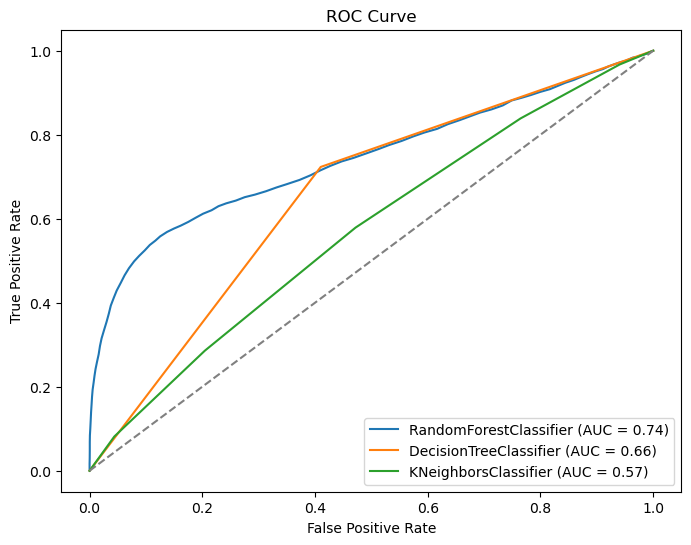

RandomForestClassifier: AUC = 0.7429

DecisionTreeClassifier: AUC = 0.6566

KNeighborsClassifier: AUC = 0.5717



In [150]:
# Classification Models Evaluation with ROC Curve

from sklearn.metrics import roc_curve, auc

print("\nClassification Models Evaluation with ROC Curve:")
class_models = [RandomForestClassifier(), DecisionTreeClassifier(), KNeighborsClassifier()]

roc_curves = []
auc_scores = []

plt.figure(figsize=(8, 6))
for model in class_models:
    y_proba = cross_val_predict(model, X_train_class, y_train_class, cv=5, method='predict_proba')
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_train_class, y_proba[:, 1])  
    
    # Calculate AUC score
    auc_score = auc(fpr, tpr)
    
    # Store ROC curve and AUC score
    roc_curves.append((fpr, tpr))
    auc_scores.append(auc_score)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Print AUC scores
for model, auc_score in zip(class_models, auc_scores):
    print(f"{model.__class__.__name__}: AUC = {auc_score:.4f}")
    print()


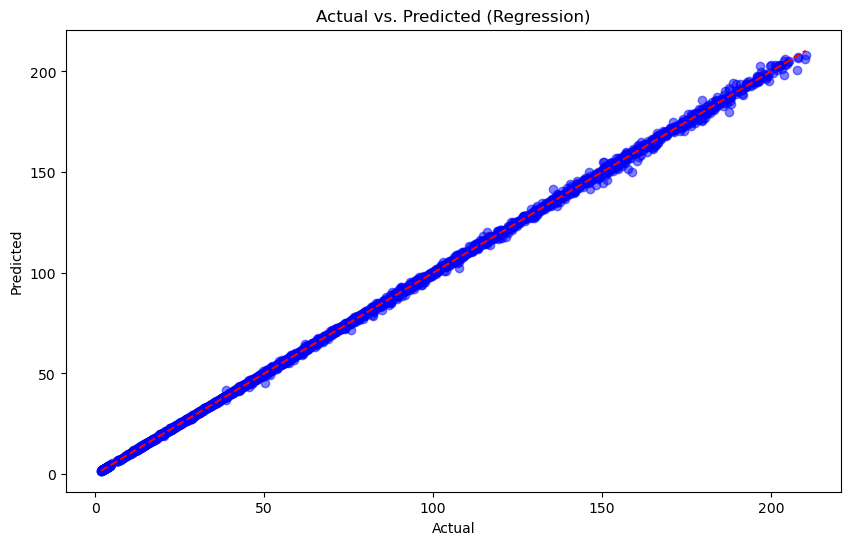

Mean Absolute Error: 0.4516
Root Mean Squared Error: 0.8130


In [151]:
import matplotlib.pyplot as plt

reg_model = RandomForestRegressor()

reg_model.fit(X_train_reg, y_train_reg)

y_pred_reg = reg_model.predict(X_test_reg)

mae = mean_absolute_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))

plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg, color='blue', alpha=0.5)
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], linestyle='--', color='red')
plt.title('Actual vs. Predicted (Regression)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")

In [152]:
# #Perform Feature Importance Analysis All features 

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
feature_names = X.columns

# I use RandomForest models for feature importance analysis
rf_regressor = RandomForestRegressor(random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)


rf_regressor.fit(X_train_reg, y_train_reg)
rf_classifier.fit(X_train_class, y_train_class)

importances_reg = rf_regressor.feature_importances_
importances_class = rf_classifier.feature_importances_

top_n_idx_reg = np.argsort(importances_reg)[-3:]
top_n_features_reg = feature_names[top_n_idx_reg]

top_n_idx_class = np.argsort(importances_class)[-3:]  
top_n_features_class = feature_names[top_n_idx_class]

print("Selected Top Features for Regression:", top_n_features_reg)
print("Selected Top Features for Classification:", top_n_features_class)


Selected Top Features for Regression: Index(['Open', 'Low', 'High'], dtype='object')
Selected Top Features for Classification: Index(['Low', 'High', 'Volume'], dtype='object')


In [153]:
# Evaluation with selected features

print("\nRegression Models Evaluation with Selected Features:")
reg_models = [RandomForestRegressor(), DecisionTreeRegressor(), KNeighborsRegressor()]

top_n_features_reg_indices = [X.columns.get_loc(feature_name) for feature_name in top_n_features_reg]

X_train_reg_selected = X_train_reg[:, top_n_features_reg_indices]
X_test_reg_selected = X_test_reg[:, top_n_features_reg_indices]

for model in reg_models:
    cv_results = cross_validate(model, X_train_reg_selected, y_train_reg, cv=5,
                                scoring={'MAE': 'neg_mean_absolute_error', 
                                         'RMSE': 'neg_root_mean_squared_error'},
                                return_train_score=False)
    mae = -cv_results['test_MAE'].mean()
    rmse = -np.sqrt(-cv_results['test_RMSE'].mean())
    print(f"{model.__class__.__name__}: MAE = {mae:.4f}, RMSE = {rmse:.4f}")


print("\nClassification Models Evaluation with Selected Features:")
class_models = [RandomForestClassifier(), DecisionTreeClassifier(), KNeighborsClassifier()]
for model in class_models:
    X_train_selected = X_train_class[:, top_n_idx_class]
    y_pred = cross_val_predict(model, X_train_selected, y_train_class, cv=5)
    
    accuracy = accuracy_score(y_train_class, y_pred)
    precision = precision_score(y_train_class, y_pred, average='macro')
    recall = recall_score(y_train_class, y_pred, average='macro')
    f1 = f1_score(y_train_class, y_pred, average='macro')
    cm = confusion_matrix(y_train_class, y_pred)
    
    print(f"{model.__class__.__name__}: Accuracy = {accuracy:.4f}, Precision = {precision:.4f}, Recall = {recall:.4f}, F1-Score = {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print()
    


Regression Models Evaluation with Selected Features:
RandomForestRegressor: MAE = 0.4525, RMSE = -0.9050
DecisionTreeRegressor: MAE = 0.5792, RMSE = -1.0552
KNeighborsRegressor: MAE = 0.4482, RMSE = -0.8974

Classification Models Evaluation with Selected Features:
RandomForestClassifier: Accuracy = 0.6575, Precision = 0.6584, Recall = 0.6575, F1-Score = 0.6570
Confusion Matrix:
[[5383 3300]
 [2660 6061]]

DecisionTreeClassifier: Accuracy = 0.6501, Precision = 0.6528, Recall = 0.6500, F1-Score = 0.6485
Confusion Matrix:
[[5062 3621]
 [2468 6253]]

KNeighborsClassifier: Accuracy = 0.5560, Precision = 0.5561, Recall = 0.5559, F1-Score = 0.5556
Confusion Matrix:
[[4592 4091]
 [3637 5084]]




Classification Models Evaluation with Selected Features:


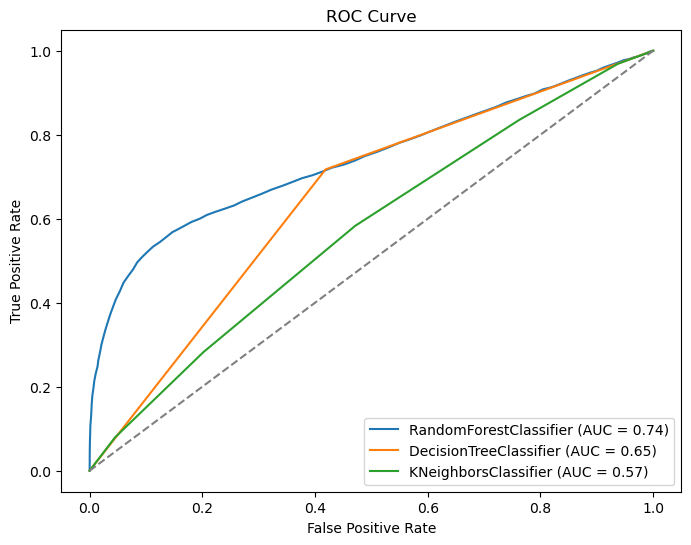

RandomForestClassifier: AUC = 0.7394

DecisionTreeClassifier: AUC = 0.6494

KNeighborsClassifier: AUC = 0.5727



In [154]:
# Classification Models Evaluation with Selected Features and ROC Curve

from sklearn.metrics import roc_curve, auc

print("\nClassification Models Evaluation with Selected Features:")
class_models = [RandomForestClassifier(), DecisionTreeClassifier(), KNeighborsClassifier()]

roc_curves = []
auc_scores = []

plt.figure(figsize=(8, 6))
for model in class_models:
    X_train_selected = X_train_class[:, top_n_idx_class]
    y_proba = cross_val_predict(model, X_train_selected, y_train_class, cv=5, method='predict_proba')
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_train_class, y_proba[:, 1])
    
    # Calculate AUC score
    auc_score = auc(fpr, tpr)
    
    # Store ROC curve and AUC score
    roc_curves.append((fpr, tpr))
    auc_scores.append(auc_score)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Print AUC scores
for model, auc_score in zip(class_models, auc_scores):
    print(f"{model.__class__.__name__}: AUC = {auc_score:.4f}")
    print()


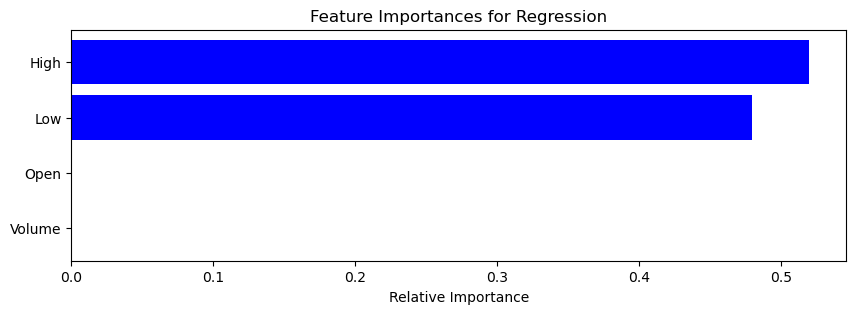

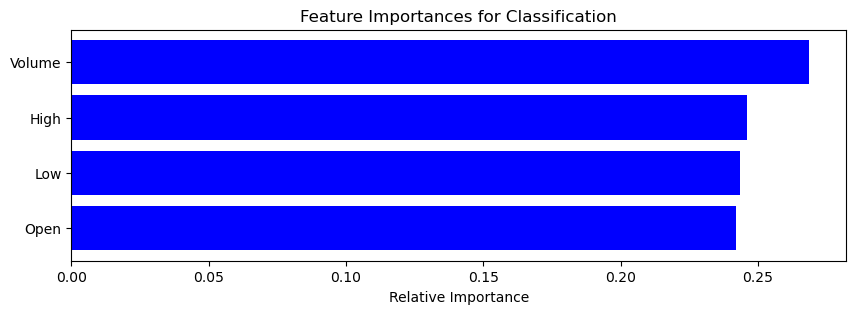

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_importances(importances, features, title):
    indices = np.argsort(importances)
    sorted_features = [features[i] for i in indices]
    
    plt.figure(figsize=(10, 3))
    plt.title(title)
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), sorted_features)
    plt.xlabel('Relative Importance')
    plt.show()

plot_feature_importances(importances_reg, X.columns, "Feature Importances for Regression")
plot_feature_importances(importances_class, X.columns, "Feature Importances for Classification")

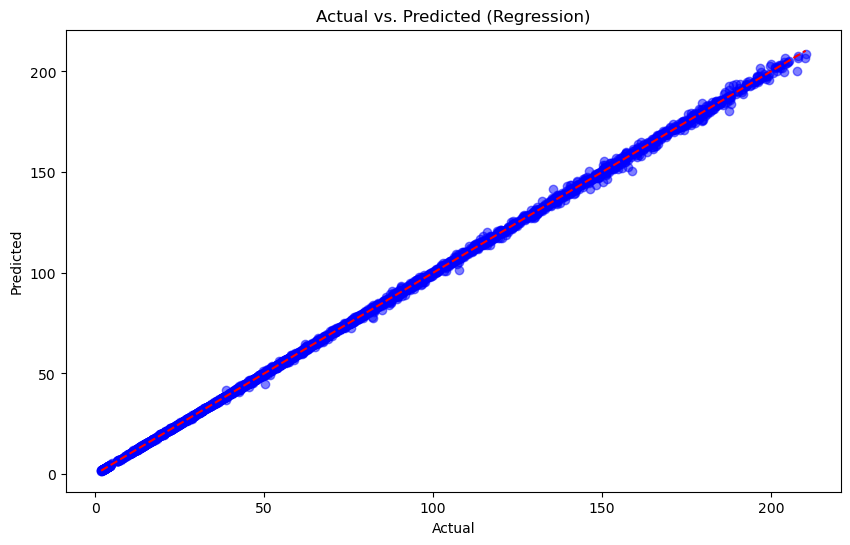

Mean Absolute Error: 0.4437
Root Mean Squared Error: 0.7943


In [156]:

from sklearn.metrics import mean_absolute_error, mean_squared_error

reg_model = RandomForestRegressor(random_state=42)

reg_model.fit(X_train_reg_selected, y_train_reg)

y_pred_reg = reg_model.predict(X_test_reg_selected)

mae = mean_absolute_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))

plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg, color='blue', alpha=0.5)
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], linestyle='--', color='red')
plt.title('Actual vs. Predicted (Regression)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")


In [ ]:
                       ##############################################################################

In [ ]:
                       ############### MODELING WITH ADDING NEW FEATURES   ##########################

In [ ]:
                       ##############################################################################

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataset_path = 'C:/Users/adnan/OneDrive/Desktop/CIND820 capstone/dataset.csv'
df = pd.read_csv(dataset_path)
print(df.head(10))

  Company        Date Close/Last    Volume      Open       High       Low
0    AAPL  07/17/2023    $193.99  50520160   $191.90    $194.32   $191.81
1    AAPL  07/14/2023    $190.69  41616240   $190.23  $191.1799   $189.63
2    AAPL  07/13/2023    $190.54  41342340   $190.50    $191.19   $189.78
3    AAPL  07-12-2023    $189.77  60750250   $189.68    $191.70   $188.47
4    AAPL  07-11-2023    $188.08  46638120   $189.16    $189.30   $186.60
5    AAPL  07-10-2023    $188.61  59922160   $189.26    $189.99  $187.035
6    AAPL  07-07-2023    $190.68  46815000   $191.41    $192.67   $190.24
7    AAPL  07-06-2023    $191.81  45156010   $189.84    $192.02   $189.20
8    AAPL  07-05-2023    $191.33  46920260  $191.565    $192.98   $190.62
9    AAPL  07-03-2023    $192.46  31346600   $193.78    $193.88   $191.76


In [158]:
# Convert columns with dollar sign to numeric and Date column to datetime

cols_with_dollar = ['Close/Last', 'Open', 'High', 'Low']
df[cols_with_dollar] = df[cols_with_dollar].replace({'\$': '', ',': ''}, regex=True).astype(float)
def parse_mixed_dates(date_str):
    
    try:
        return pd.to_datetime(date_str, format='%m/%d/%Y')
    except ValueError:
        
        try:
            return pd.to_datetime(date_str, format='%d-%m-%Y')
        except ValueError:
            
            return pd.NaT


df['Date'] = df['Date'].apply(parse_mixed_dates)

print(df.head(10))

descriptive_stats = df.describe()
print(descriptive_stats)

path = 'C:/Users/adnan/OneDrive/Desktop/CIND820 capstone/'

descriptive_stats.to_csv('descriptive_stats.csv')
descriptive_stats.to_excel('descriptive_stats.xlsx')
descriptive_stats.to_latex('descriptive_stats.tex')



  Company       Date  Close/Last    Volume     Open      High      Low
0    AAPL 2023-07-17      193.99  50520160  191.900  194.3200  191.810
1    AAPL 2023-07-14      190.69  41616240  190.230  191.1799  189.630
2    AAPL 2023-07-13      190.54  41342340  190.500  191.1900  189.780
3    AAPL 2023-12-07      189.77  60750250  189.680  191.7000  188.470
4    AAPL 2023-11-07      188.08  46638120  189.160  189.3000  186.600
5    AAPL 2023-10-07      188.61  59922160  189.260  189.9900  187.035
6    AAPL 2023-07-07      190.68  46815000  191.410  192.6700  190.240
7    AAPL 2023-06-07      191.81  45156010  189.840  192.0200  189.200
8    AAPL 2023-05-07      191.33  46920260  191.565  192.9800  190.620
9    AAPL 2023-03-07      192.46  31346600  193.780  193.8800  191.760
                                Date    Close/Last        Volume  \
count                          25160  25160.000000  2.516000e+04   
mean   2018-07-16 12:08:00.763115776    102.455878  5.131764e+07   
min            

In [159]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier


def calculate_momentum(series, period=14):
    momentum = series.diff(period)
    return momentum

def calculate_stochastic_oscillator(df, high_col='High', low_col='Low', close_col='Close/Last', period=14, smooth_k=3, smooth_d=3):
   
    # Calculate the highest high and lowest low over the period
    
    df['Highest High'] = df[high_col].rolling(window=period).max()
    df['Lowest Low'] = df[low_col].rolling(window=period).min()
    
 
    df['%K'] = ((df[close_col] - df['Lowest Low']) / (df['Highest High'] - df['Lowest Low'])) * 100
    
    
    df['%D'] = df['%K'].rolling(window=smooth_k).mean().rolling(window=smooth_d).mean()
    
    
    df.drop(['Highest High', 'Lowest Low'], axis=1, inplace=True)
    
    return df[['%K', '%D']]


df['Momentum'] = calculate_momentum(df['Close/Last'])

stochastic_oscillator = calculate_stochastic_oscillator(df)

df.dropna(inplace=True)

print(df.head(5))


   Company       Date  Close/Last     Volume    Open    High       Low  \
17    AAPL 2023-06-21      183.96   49515700  184.90  185.41  182.5901   
18    AAPL 2023-06-20      185.01   49799090  184.41  186.10  184.4100   
19    AAPL 2023-06-16      184.92  101256200  186.73  186.99  184.2700   
20    AAPL 2023-06-15      186.01   65433170  183.96  186.52  183.7800   
21    AAPL 2023-06-14      183.95   57462880  183.37  184.39  182.0200   

    Momentum         %K         %D  
17     -5.81  11.521543  17.114244  
18     -3.07  20.352568  19.056866  
19     -3.69  19.595623  19.345516  
20     -4.67  28.763068  20.317768  
21     -7.86  15.489567  20.447695  


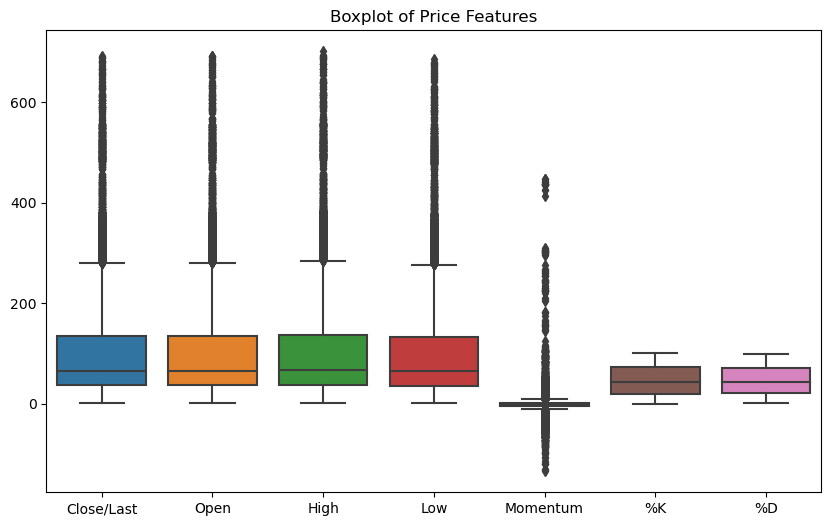

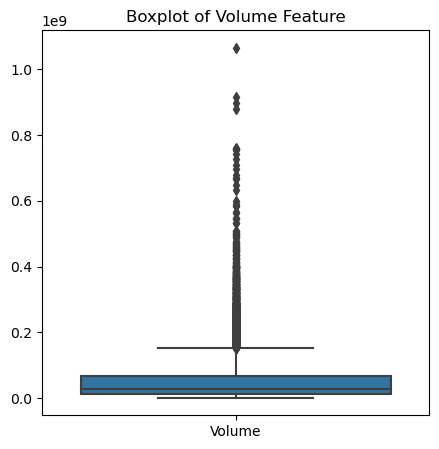

In [160]:
# Boxplot of Price features


df_prices = df[['Close/Last', 'Open', 'High', 'Low','Momentum','%K','%D']]  
df_volume = df[['Volume']]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_prices)
plt.title('Boxplot of Price Features')
plt.show()

plt.figure(figsize=(5, 5))
sns.boxplot(data=df_volume)
plt.title('Boxplot of Volume Feature')
plt.show()


In [161]:
# To remove the outliers 

columns_to_check = ['Close/Last', 'Volume','Open', 'High', 'Low','Momentum','%K','%D']  
df_filtered = df.copy()
outliers_removed = {}  

for column in columns_to_check:
    Q1 = df_filtered[column].quantile(0.25)
    Q3 = df_filtered[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_removed[column] = len(df_filtered) - len(df_filtered[(df_filtered[column] >= lower_bound) & (df_filtered[column] <= upper_bound)])

    df_filtered = df_filtered[(df_filtered[column] >= lower_bound) & (df_filtered[column] <= upper_bound)]

total_outliers_removed = sum(outliers_removed.values())
print(f"Total number of outliers removed: {total_outliers_removed}")

for column, count in outliers_removed.items():
    print(f"Number of outliers removed in {column}: {count}")


Total number of outliers removed: 7515
Number of outliers removed in Close/Last: 1907
Number of outliers removed in Volume: 1421
Number of outliers removed in Open: 784
Number of outliers removed in High: 282
Number of outliers removed in Low: 128
Number of outliers removed in Momentum: 2993
Number of outliers removed in %K: 0
Number of outliers removed in %D: 0


In [162]:
#Feature Engineering

df = df_filtered.copy()


df.loc[:, 'Price Change'] = df['Close/Last'].diff()
df.loc[:, 'Target'] = df['Price Change'].apply(lambda x: 1 if x > 0 else 0)


X = df[['Volume', 'Open', 'High', 'Low','Momentum','%K','%D']]  
y_regression = df['Close/Last']            # Regression target
y_classification = df['Target']            # Classification target
X

,Volume,Open,High,Low,Momentum,%K,%D
17,49515700,184.9000,185.4100,182.5901,-5.8100,11.521543,17.114244
18,49799090,184.4100,186.1000,184.4100,-3.0700,20.352568,19.056866
19,101256200,186.7300,186.9900,184.2700,-3.6900,19.595623,19.345516
20,65433170,183.9600,186.5200,183.7800,-4.6700,28.763068,20.317768
21,57462880,183.3700,184.3900,182.0200,-7.8600,15.489567,20.447695
...,...,...,...,...,...,...,...
25155,33395351,35.6743,36.0357,34.3143,-2.5557,7.858500,20.391304
25156,76792963,35.9143,37.4621,35.1714,-0.9057,46.361270,24.206283
25157,44791095,38.1214,38.3928,36.7314,1.3157,76.456311,30.886398
25158,18098750,38.2043,38.2784,37.5971,2.0252,85.529126,47.098624


Class Counts:
Target
0    9363
1    8265
Name: count, dtype: int64

Class Imbalance Ratio: 0.8827298942646588


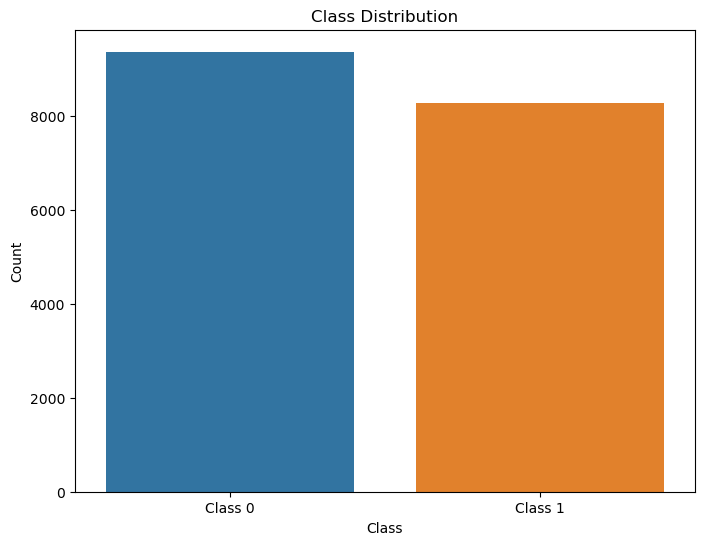

In [163]:
### Balance the classes in the target variable 

class_counts = df['Target'].value_counts()

print("Class Counts:")
print(class_counts)

imbalance_ratio = class_counts.min() / class_counts.max()

print("\nClass Imbalance Ratio:", imbalance_ratio)


import seaborn as sns

class_counts = df['Target'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(range(len(class_counts.index)), ['Class 0', 'Class 1'])
plt.show()


Class Counts after Upsampling:
Target
0    9363
1    9363
Name: count, dtype: int64


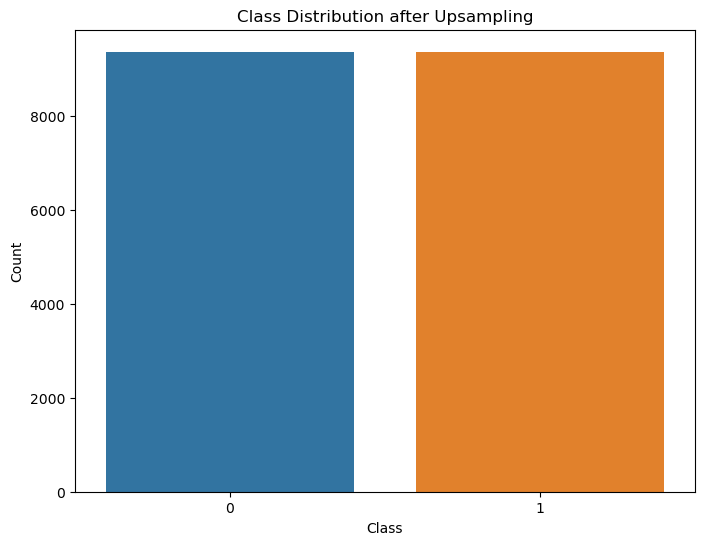

In [164]:

from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns

df_combined = pd.concat([X, y_classification], axis=1)

df_majority = df_combined[df_combined['Target'] == 0]
df_minority = df_combined[df_combined['Target'] == 1]

df_minority_upsampled = resample(df_minority, 
                                 replace=True,   
                                 n_samples=len(df_majority),    
                                 random_state=123) 

df_upsampled = pd.concat([df_majority, df_minority_upsampled])

class_counts_upsampled = df_upsampled['Target'].value_counts()
print("Class Counts after Upsampling:")
print(class_counts_upsampled)

X_upsampled = df_upsampled[['Volume', 'Open', 'High', 'Low','Momentum','%K','%D']]
y_classification_upsampled = df_upsampled['Target']

plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts_upsampled.index, y=class_counts_upsampled.values)
plt.title('Class Distribution after Upsampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(range(len(class_counts_upsampled.index)), class_counts_upsampled.index)
plt.show()

In [165]:
#Model Building and Evaluation

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_upsampled, y_classification_upsampled, test_size=0.2, random_state=42)

scaler_reg = StandardScaler()
scaler_class = StandardScaler()

scaler_reg.fit(X_train_reg)
scaler_class.fit(X_train_class)

X_train_reg = scaler_reg.transform(X_train_reg)
X_train_class = scaler_class.transform(X_train_class)

X_test_reg = scaler_reg.transform(X_test_reg)
X_test_class = scaler_class.transform(X_test_class)

In [167]:
import pandas as pd

feature_names = ['Volume', 'Open', 'High', 'Low','Momentum','%K','%D']

X_train_reg_df = pd.DataFrame(X_train_reg, columns=feature_names)


X_test_class_df = pd.DataFrame(X_test_class, columns=feature_names)



In [168]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier


reg_models = [RandomForestRegressor(), DecisionTreeRegressor(), KNeighborsRegressor()]

class_models = [RandomForestClassifier(), DecisionTreeClassifier(), KNeighborsClassifier()]

print("Regression Models Evaluation:")
for model in reg_models:
    cv_results = cross_validate(model, X_train_reg, y_train_reg, cv=5,
                                scoring={'MAE': 'neg_mean_absolute_error', 
                                         'RMSE': 'neg_root_mean_squared_error'},
                                return_train_score=False)
    mae = -cv_results['test_MAE'].mean()
    rmse = -np.sqrt(-cv_results['test_RMSE'].mean())
    print(f"{model.__class__.__name__}: MAE = {mae:.4f}, RMSE = {rmse:.4f}")


print("\nClassification Models Evaluation:")
for model in class_models:
    y_pred = cross_val_predict(model, X_train_class, y_train_class, cv=5)
    
    
    accuracy = accuracy_score(y_train_class, y_pred)
    precision = precision_score(y_train_class, y_pred, average='macro')  
    recall = recall_score(y_train_class, y_pred, average='macro')
    f1 = f1_score(y_train_class, y_pred, average='macro')
    cm = confusion_matrix(y_train_class, y_pred)
    
    print(f"{model.__class__.__name__}:")
    print(f"Accuracy = {accuracy:.4f}, Precision = {precision:.4f}, Recall = {recall:.4f}, F1-Score = {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print() 

Regression Models Evaluation:
RandomForestRegressor: MAE = 0.3685, RMSE = -0.8129
DecisionTreeRegressor: MAE = 0.4801, RMSE = -0.9432
KNeighborsRegressor: MAE = 1.9878, RMSE = -1.6657

Classification Models Evaluation:
RandomForestClassifier:
Accuracy = 0.8219, Precision = 0.8227, Recall = 0.8219, F1-Score = 0.8218
Confusion Matrix:
[[5963 1525]
 [1143 6349]]

DecisionTreeClassifier:
Accuracy = 0.7600, Precision = 0.7617, Recall = 0.7600, F1-Score = 0.7596
Confusion Matrix:
[[5390 2098]
 [1497 5995]]

KNeighborsClassifier:
Accuracy = 0.7258, Precision = 0.7262, Recall = 0.7258, F1-Score = 0.7256
Confusion Matrix:
[[5265 2223]
 [1885 5607]]




Classification Models Evaluation with ROC Curve:


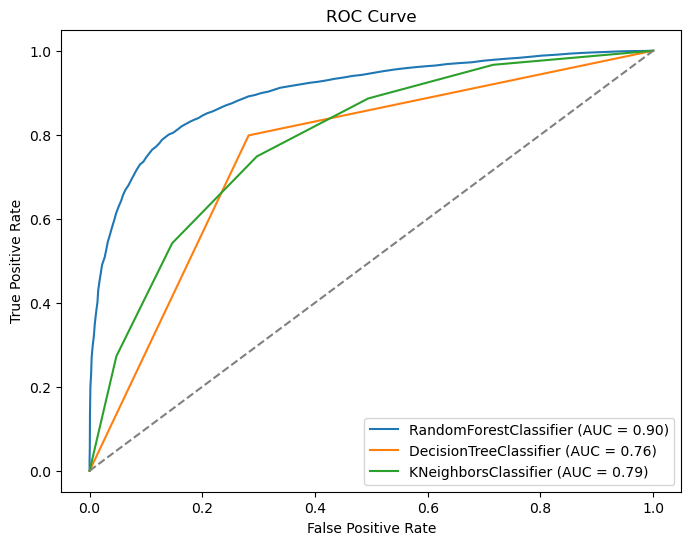

RandomForestClassifier: AUC = 0.9006

DecisionTreeClassifier: AUC = 0.7581

KNeighborsClassifier: AUC = 0.7897



In [169]:
# Classification Models Evaluation with ROC Curve

from sklearn.metrics import roc_curve, auc

print("\nClassification Models Evaluation with ROC Curve:")
class_models = [RandomForestClassifier(), DecisionTreeClassifier(), KNeighborsClassifier()]

roc_curves = []
auc_scores = []

plt.figure(figsize=(8, 6))
for model in class_models:
    y_proba = cross_val_predict(model, X_train_class, y_train_class, cv=5, method='predict_proba')
    
    fpr, tpr, _ = roc_curve(y_train_class, y_proba[:, 1])  
    
    auc_score = auc(fpr, tpr)
    
    roc_curves.append((fpr, tpr))
    auc_scores.append(auc_score)
    
    plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

for model, auc_score in zip(class_models, auc_scores):
    print(f"{model.__class__.__name__}: AUC = {auc_score:.4f}")
    print()


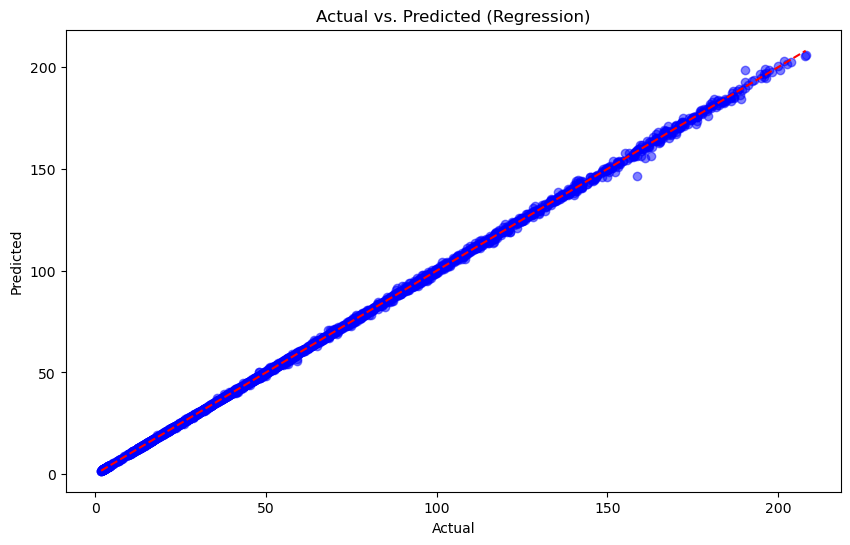

Mean Absolute Error: 0.3708
Root Mean Squared Error: 0.6792


In [170]:
import matplotlib.pyplot as plt

reg_model = RandomForestRegressor()

reg_model.fit(X_train_reg, y_train_reg)

y_pred_reg = reg_model.predict(X_test_reg)

mae = mean_absolute_error(y_test_reg, y_pred_reg)

rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg, color='blue', alpha=0.5)
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], linestyle='--', color='red')
plt.title('Actual vs. Predicted (Regression)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")

In [171]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

feature_names = X.columns

rf_regressor = RandomForestRegressor(random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)

rf_regressor.fit(X_train_reg, y_train_reg)
rf_classifier.fit(X_train_class, y_train_class)

importances_reg = rf_regressor.feature_importances_
importances_class = rf_classifier.feature_importances_

top_n_idx_reg = np.argsort(importances_reg)[-3:] 
top_n_features_reg = feature_names[top_n_idx_reg]

top_n_idx_class = np.argsort(importances_class)[-3:]  
top_n_features_class = feature_names[top_n_idx_class]

print("Selected Top Features for Regression:", top_n_features_reg)
print("Selected Top Features for Classification:", top_n_features_class)

Selected Top Features for Regression: Index(['Open', 'High', 'Low'], dtype='object')
Selected Top Features for Classification: Index(['Momentum', '%D', '%K'], dtype='object')


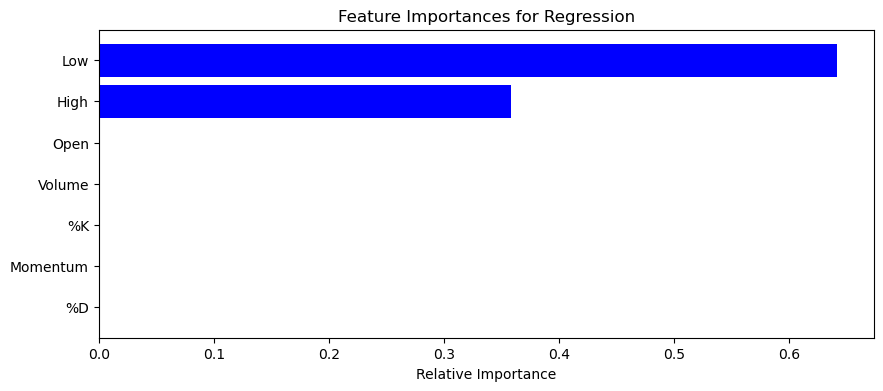

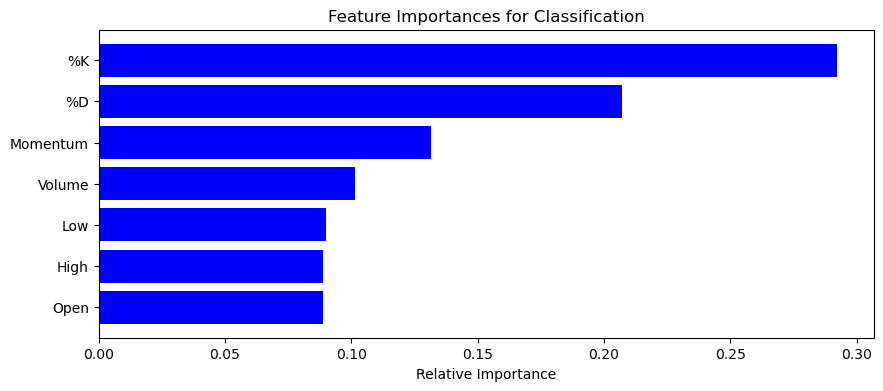

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_importances(importances, features, title):
    indices = np.argsort(importances)
    sorted_features = [features[i] for i in indices]
    
    plt.figure(figsize=(10, 4))
    plt.title(title)
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), sorted_features)
    plt.xlabel('Relative Importance')
    plt.show()

plot_feature_importances(importances_reg, X.columns, "Feature Importances for Regression")
plot_feature_importances(importances_class, X.columns, "Feature Importances for Classification")

In [173]:
# Regression and classification Models Evaluation with Selected Features

print("\nRegression Models Evaluation with Selected Features:")
reg_models = [RandomForestRegressor(), DecisionTreeRegressor(), KNeighborsRegressor()]

top_n_features_reg_indices = [X.columns.get_loc(feature_name) for feature_name in top_n_features_reg]

X_train_reg_selected = X_train_reg[:, top_n_features_reg_indices]
X_test_reg_selected = X_test_reg[:, top_n_features_reg_indices]


for model in reg_models:
    cv_results = cross_validate(model, X_train_reg_selected, y_train_reg, cv=5,
                                scoring={'MAE': 'neg_mean_absolute_error', 
                                         'RMSE': 'neg_root_mean_squared_error'},
                                return_train_score=False)
    mae = -cv_results['test_MAE'].mean()
    rmse = -np.sqrt(-cv_results['test_RMSE'].mean())
    
    print(f"{model.__class__.__name__}: MAE = {mae:.4f}, RMSE = {rmse:.4f}")


print("\nClassification Models Evaluation with Selected Features:")
class_models = [RandomForestClassifier(), DecisionTreeClassifier(), KNeighborsClassifier()]
for model in class_models:
    X_train_selected = X_train_class[:, top_n_idx_class]
    y_pred = cross_val_predict(model, X_train_selected, y_train_class, cv=5)
    
    accuracy = accuracy_score(y_train_class, y_pred)
    precision = precision_score(y_train_class, y_pred, average='macro')
    recall = recall_score(y_train_class, y_pred, average='macro')
    f1 = f1_score(y_train_class, y_pred, average='macro')
    cm = confusion_matrix(y_train_class, y_pred)
    
    print(f"{model.__class__.__name__}: Accuracy = {accuracy:.4f}, Precision = {precision:.4f}, Recall = {recall:.4f}, F1-Score = {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print()


Regression Models Evaluation with Selected Features:
RandomForestRegressor: MAE = 0.3606, RMSE = -0.8060
DecisionTreeRegressor: MAE = 0.4547, RMSE = -0.9187
KNeighborsRegressor: MAE = 0.3541, RMSE = -0.7969

Classification Models Evaluation with Selected Features:
RandomForestClassifier: Accuracy = 0.8162, Precision = 0.8171, Recall = 0.8161, F1-Score = 0.8160
Confusion Matrix:
[[5910 1578]
 [1176 6316]]

DecisionTreeClassifier: Accuracy = 0.7693, Precision = 0.7707, Recall = 0.7693, F1-Score = 0.7690
Confusion Matrix:
[[5487 2001]
 [1455 6037]]

KNeighborsClassifier: Accuracy = 0.7433, Precision = 0.7437, Recall = 0.7433, F1-Score = 0.7431
Confusion Matrix:
[[5412 2076]
 [1770 5722]]




Classification Models Evaluation with Selected Features:


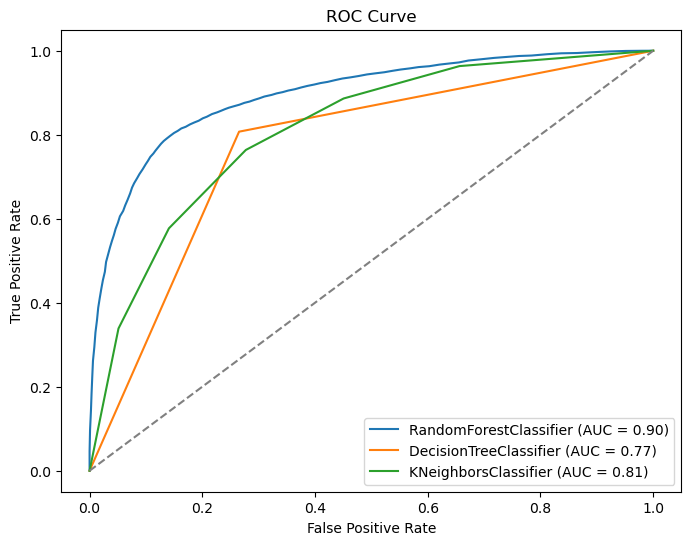

RandomForestClassifier: AUC = 0.8952

DecisionTreeClassifier: AUC = 0.7710

KNeighborsClassifier: AUC = 0.8118



In [174]:
# Classification Models Evaluation with Selected Features and ROC Curve

from sklearn.metrics import roc_curve, auc

print("\nClassification Models Evaluation with Selected Features:")

class_models = [RandomForestClassifier(), DecisionTreeClassifier(), KNeighborsClassifier()]

roc_curves = []
auc_scores = []

plt.figure(figsize=(8, 6))
for model in class_models:
    X_train_selected = X_train_class[:, top_n_idx_class]
    y_proba = cross_val_predict(model, X_train_selected, y_train_class, cv=5, method='predict_proba')
    
    fpr, tpr, _ = roc_curve(y_train_class, y_proba[:, 1])  
    
    auc_score = auc(fpr, tpr)
    
    roc_curves.append((fpr, tpr))
    auc_scores.append(auc_score)
    
    plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

for model, auc_score in zip(class_models, auc_scores):
    print(f"{model.__class__.__name__}: AUC = {auc_score:.4f}")
    print()


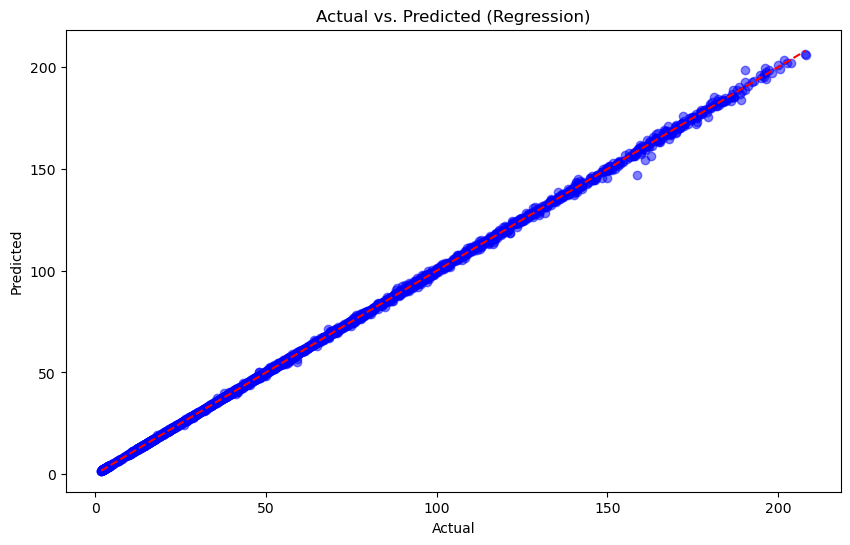

Mean Absolute Error: 0.3629
Root Mean Squared Error: 0.6726


In [175]:
# Plot actual vs. predicted for regression

from sklearn.metrics import mean_absolute_error, mean_squared_error

reg_model = RandomForestRegressor(random_state=42)

reg_model.fit(X_train_reg_selected, y_train_reg)

y_pred_reg = reg_model.predict(X_test_reg_selected)

mae = mean_absolute_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))


plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg, color='blue', alpha=0.5)
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], linestyle='--', color='red')
plt.title('Actual vs. Predicted (Regression)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")